# UBCO Data 301 Group 11 
## Milestone 2 Submission - Task 4 Group Data Analysis
## Wesley Burchnall, Andy McLean and Abirinder Brar


### Importing the package that contains our project functions

In [12]:
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import sys
sys.path.append('..')
from scripts import project_fuctions as pf

### Loading the data

In [2]:
### Loading the DataFrames for EDA
masterDF = pf.load_and_process()
MLS_BC_HPI_DF = pf.loadMLSRegionalHPIData()

## Exploring the data through a custom-made describe function that features breakdown by decade

### An Introduction

The variables I have choosen to explore in my EDA are new house prices, prime interest rate for mortgages and total savings as a % of GDP; each with its own reasoning why these may be good indicators of future crashes. First, seeing the change in house prices before previous crashes in 93 and 2008, and shape/time the subsequent recovery took, may provide some indicator of what housing price fluxation leading up to a crash will look like. Secondly, low prime interest rates for mortgages effect the cost of borrowing and allow customers to spend-more-money with a lower monthly payment.  Third, most mortgages require a downpayment. This is usually reflective in Canadians creating a store of money in savings which is then used as a down payment. A lack of Canadian savings, might necessitate difficulty getting mortgage approval and be related to a market-crash.

#### Examining Prime Rate - How does Historical Prime Rate compare to today?
#### Graphical Examination

Figure 1 and 2: A graph of changes in Prime Interest rate for mortgages over time as bar and scatter plots. A general trend of decreasing interest rates from the 80s to 00s. Around 00s, the decrease stalls and interest rates remain fairly flat. There are noteable spikes in interesting rates that break from the general trend downards. The first is around 1989-1991 just prior to the 1993 crash. The second is three years of interest rate rises from 2005 to 2007 prior to the 2008 crash. Interest rates may be beginning to rise in 2018 onwards. 

Possible explanation for this behavior is interest rates effect buying habits. When interest rates increase, the cost of mortgage payments at current housing prices will also correspondingly increase. This would result in less ability to finance expensive homes and could result in a downward swing in housing prices. 

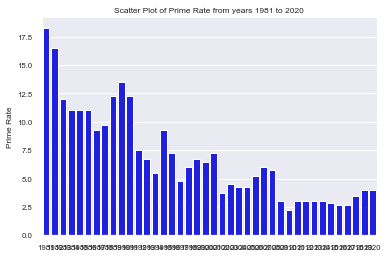

In [3]:
pf.barPlotOverTime(masterDF,'Prime Rate',41,25,12,'blue')

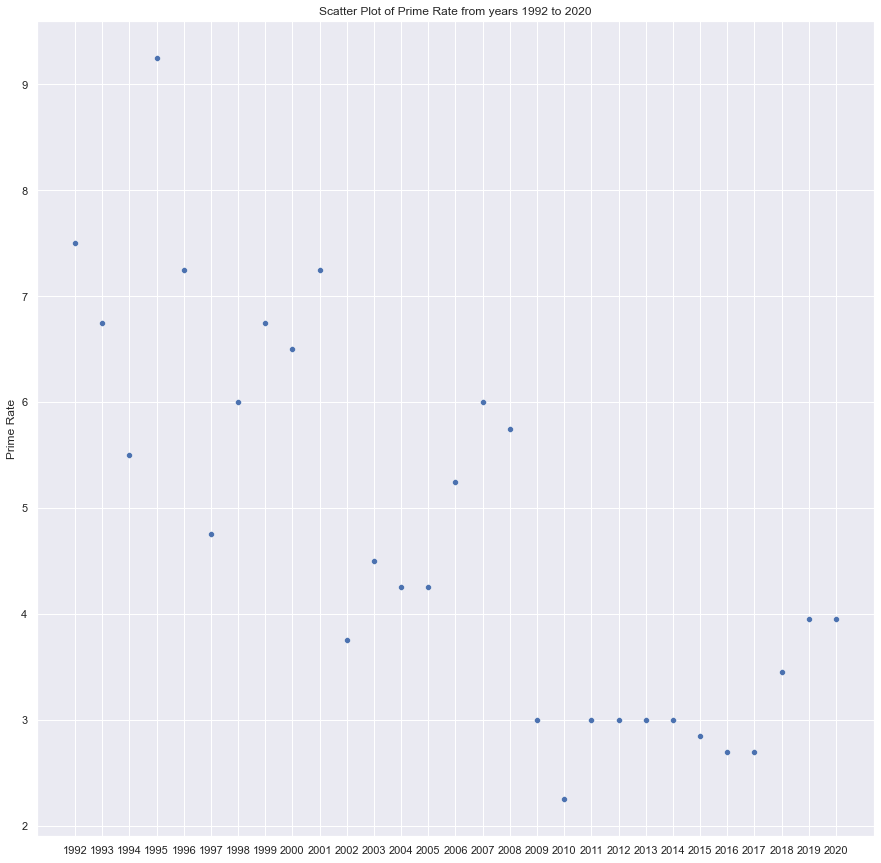

In [4]:
pf.scatterPlotOverTime(masterDF,'Prime Rate',30,15,15)

#### Statistical Examination

In [5]:
pf.printStatTableByDecade(masterDF,'Prime Rate')

A Summary of Stats Prime Rate By Decades in Tabular Form
--------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 12.333	 | 9.25	 | 18.25 |
90s    | 7.95	 | 4.75	 | 13.5 |
00s    | 5.05	 | 3.0	 | 7.25 |
10s    | 2.99	 | 2.25	 | 3.95 |
20s    | 3.2	 | 2.45	 | 3.95 |


Observation: Downward trends from 80s to 10s in Min, Max and Mean Prime Rate of Interest for Mortgages. This confirms trend shown in Figure 1 and 2 in aggregate. Additionally, in 2020s, we can see the max and min did not decrease, and the mean actually increased.

#### Examining BC New Housing Price Index - How does Historical Housing Prices compare to today?
#### Graphical Examination

Figure 3: A graph of BC New House prices over time. We can see the 2008 housing crash reflected in the prices of new houses in BC. There is a sharp increase, leading up to 2008, followed by a period of gradual decrease until 2015. The recovery period was approximately 7 years. The 1993 crash in about 8 years until 2001 to see an increase in prices. We also see a very sharp increase from 2015 to 2018 that mirrors 2003 to 2008's continual increase. We also see a leveling in 2019 and even a small drop in 2020. If that is the start of another crash, we can expect no new growth or decreases for approximately 7-8 years.

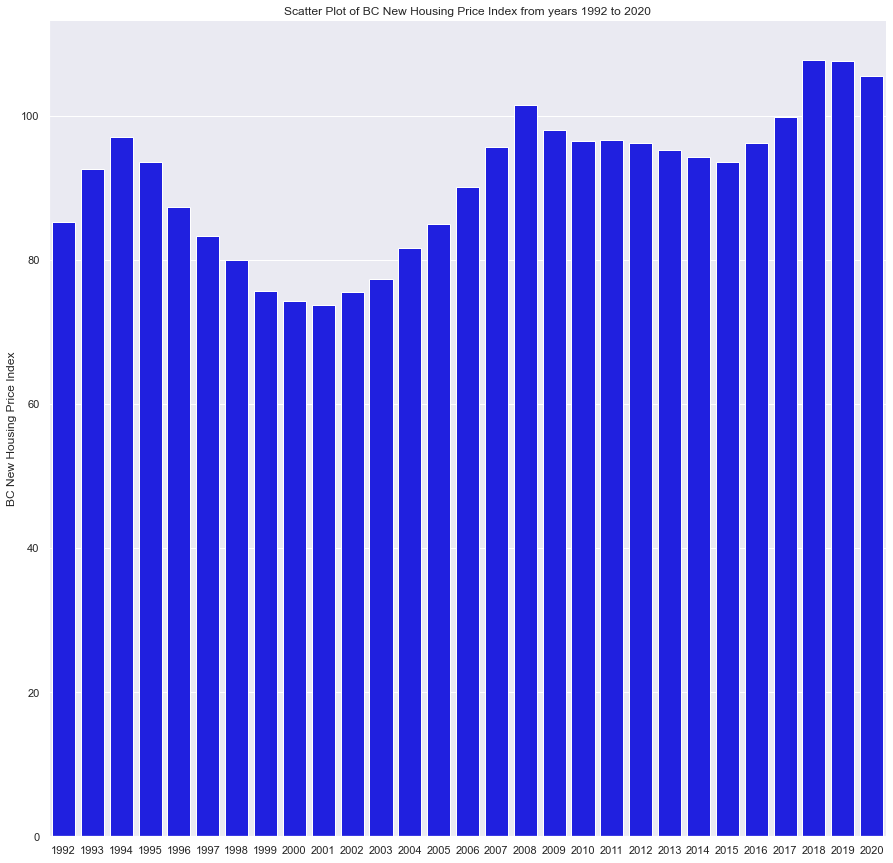

In [6]:
pf.barPlotOverTime(masterDF,'BC New Housing Price Index',30,15,15,'blue')

#### Statistical Examination

In [7]:
pf.printStatTableByDecade(masterDF,'BC New Housing Price Index')

A Summary of Stats BC New Housing Price Index By Decades in Tabular Form
------------------------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 70.3	 | 66.3	 | 76.9 |
90s    | 86.99	 | 75.7	 | 97.1 |
00s    | 85.31	 | 73.7	 | 101.5 |
10s    | 98.42	 | 93.6	 | 107.8 |
20s    | 108.9	 | 105.5	 | 112.3 |


Examining the data table above, we can see that mean, minimum and maximum housing prices rose from the 80s to 90, 00s to 10s and 10s to 2020s. We did however see a stall in the decade of 90s to 00s. As market crashes occured in '93 and 2008 respectively. The decreate in 00s housing prices compared to 90s, is reflective of the slump we say in Figure 3.

#### Examining Gross Savings - How does Gross Savings as a % of GDP change over time?
#### Graphical Examination

Figure 4: A graph of changes in Canadian Savings as a Percentage of GDP. Observations include a large-drop occurs in average canadian in 1991 and subsequent drop in 1992, just prior to the 1993 crash.  Prior to the 2008 crash, we do not see a sharp drop but zero-growth (or slightly negative growth) occurs. From 2015 to 2020, we see no growth and a slight decrease in 2020.

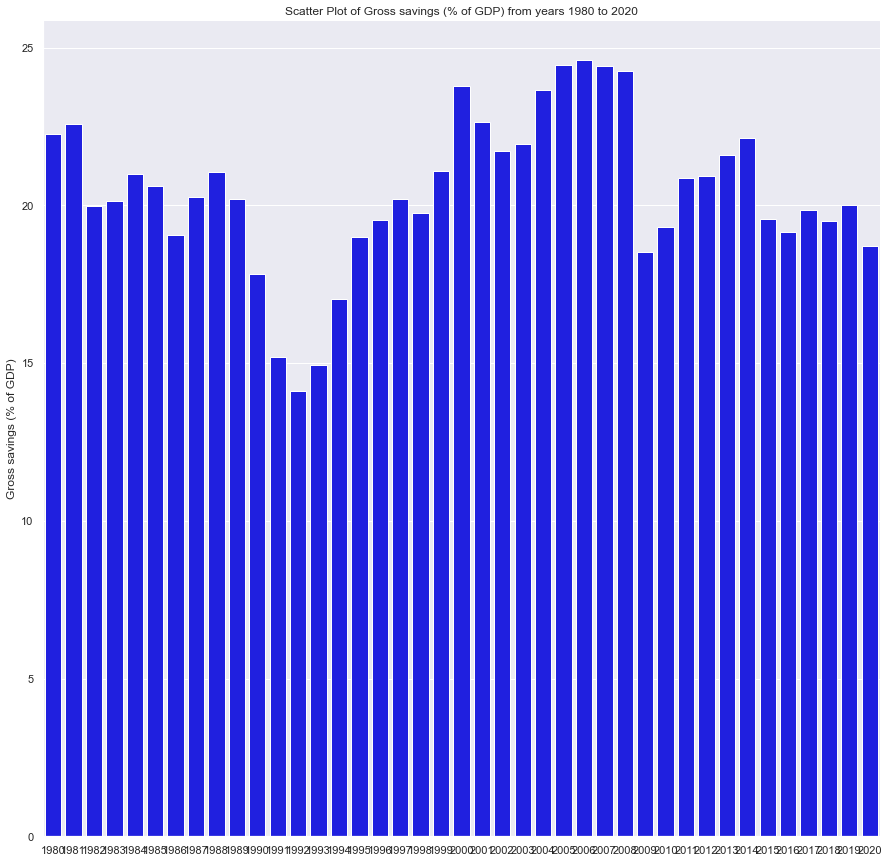

In [8]:
pf.barPlotOverTime(masterDF,'Gross savings (% of GDP)',42,20,7,'blue')

#### Statistical Examination

In [9]:
pf.printStatTableByDecade(masterDF,'Gross savings (% of GDP)')

A Summary of Stats Gross savings (% of GDP) By Decades in Tabular Form
----------------------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 20.71	 | 19.046	 | 22.568 |
90s    | 17.87	 | 14.104	 | 21.096 |
00s    | 22.998	 | 18.52	 | 24.617 |
10s    | 20.291	 | 19.146	 | 22.148 |
20s    | 18.719	 | 18.719	 | 18.719 |


Examining the data table above, observe the lowest mean savings were in the 90s and 20s. Additionally, the two lowest periods of savings, were decades which coincide with real estate crashes; the 90s and 00s.  The third lowest is current-decade. If low-savings, hinders purchasers from taking out mortgages and may indicate a looming crash, savings are as bad now as they were in 2008.

### Conclusion of Exploratory Data Analysis

All three variables examined in the EDA, new house prices, prime interest rate for mortgages and total savings as a % of GDP, each experienced changes leading up to 1993 and 2008 real estate crashes and these crashes 

## Exploring a multiple linear regression of the effect of Prime Interest Rate and Total Savings of Canadians as Percentage of GDP on BC New Housing Prices 

### Examining the effects of prime interest rate increases to 4% and 6% by 0.5% step size and total savings decreases from 18% to 14% by 1% step size.

In [56]:
X = pf.limitYears(masterDF,35).transpose()[['Prime Rate', 'Gross savings (% of GDP)']]
Y = pf.limitYears(masterDF,35).transpose()['BC New Housing Price Index']

ourMultipleLinearRegressionModel = linear_model.LinearRegression()
ourMultipleLinearRegressionModel.fit(X, Y)

print('Linear Intercept: \n', ourMultipleLinearRegressionModel.intercept_)
print('Linear Coefficients: \n', ourMultipleLinearRegressionModel.coef_)

print('\nA negative coefficient indicates increase the associated variable decreases the cost of new housing in BC.')
print('A positive coefficient indicates increase the associated variable increases the cost of new housing in BC.\n')

predictionPrimeRates = [4.00,4.50,5.00,5.50,6.00]
predictionGrossSavingPercentages = [18.00,17.00,16.00,15.00,14.00]

print("Prime Rate | Savings as % of GDP | Predicted BC New Housing Price Index")

for rate in predictionPrimeRates:
    for percentage in predictionGrossSavingPercentages:
        print (str(rate) + "        | " + str(percentage) + "                | ", str(round(ourMultipleLinearRegressionModel.predict([[rate , percentage]])[0],4)))




Linear Intercept: 
 128.80686347462242
Linear Coefficients: 
 [-2.08881392 -1.36497326]

A negative coefficient indicates increase the associated variable decreases the cost of new housing in BC.
A positive coefficient indicates increase the associated variable increases the cost of new housing in BC.

Prime Rate | Savings as % of GDP | Predicted BC New Housing Price Index
4.0        | 18.0                |  95.8821
4.0        | 17.0                |  97.2471
4.0        | 16.0                |  98.612
4.0        | 15.0                |  99.977
4.0        | 14.0                |  101.342
4.5        | 18.0                |  94.8377
4.5        | 17.0                |  96.2027
4.5        | 16.0                |  97.5676
4.5        | 15.0                |  98.9326
4.5        | 14.0                |  100.2976
5.0        | 18.0                |  93.7933
5.0        | 17.0                |  95.1582
5.0        | 16.0                |  96.5232
5.0        | 15.0                |  97.8882
5.0      

C:\Users\Wesley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [16]:
masterDF.index

Index(['All-items', 'Food', 'Shelter',
       'Household operations, furnishings and equipment',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation, education and reading',
       'Alcoholic beverages, tobacco products and recreational cannabis',
       'All-items excluding food and energy', 'All-items excluding energy',
       'Energy', 'Goods', 'Services',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment with advanced education, male (% of male labor force with advanced education)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Employment to population ratio, ages 15-24, total (%) (national estimate)',
       'Gross savings (% of GDP)', 'GDP per capita (current US$)',
       'Adjusted net national income (constant 2010 US$)',
       'Export value index (2000 = 100)',
       'Merchandise imports by the reporting e